# Venta de Viviendas en Seattle; Minería de Datos, Modelización Predicitiva & ML.

## Introducción
El objetivo de este trabajo es explorar un dataset sobre la venta de viviendas en Seattle durante el periodo comprendido entre mayo de 2014 y mayo de 2015 con el objetitvo final de predecir precio de dichas viviendas con una serie de variables predictoras que ofrece el dataset. Este dataset proviene del módulo de Minería de Datos y Modelización Predictiva del Máster de la Universidad Complutense de Madrid en Big Data, Ciencia de Datos y Business Analytics, y se utiliza en su propio marco de estudio añadiendo nociones de Machine Learning.

El análisis incluye la preparación de los datos, su exploración y la posterior construcción de un modelo para predecir el precio de las viviendas. Para ello, se ha trabajado con un conjunto de variables que describen las características de las propiedades y su entorno:

    • Year: Año de la venta.
    • Month: Mes de la venta.
    • Price: Precio de venta de la vivienda (variable objetivo).
    • Luxury: Indicador binario que señala si la vivienda se clasifica como de lujo.
    • Bedrooms: Número de habitaciones.
    • Bathrooms: Número de baños.
    • Sqft_living: Superficie habitable de la vivienda en pies cuadrados.
    • Sqft_lot: Tamaño del terreno en pies cuadrados.
    • Floors: Número de pisos de la vivienda.
    • Waterfront: Indicador binario de si la vivienda tiene vistas al mar.
    • View: Puntuación subjetiva de la calidad de la vista desde la vivienda.
    • Condition: Condición general de la vivienda categorizada en niveles. (A, B, C, D, ?)
    • Sqft_above: Superficie construida sobre el nivel del suelo en pies cuadrados.
    • Basement: Indicador binario de si la vivienda tiene sótano.
    • Yr_built: Año en que se construyó la vivienda.
    • Yr_renovated: Año de la última renovación de la vivienda (si la hay).
    • Lat: Latitud geográfica de la vivienda.
    • Long: Longitud geográfica de la vivienda.

A lo largo de este Notebook, se llevarán a cabo diversas técnicas en minería de datos para abordar los errores, incoherencias y dificultades que presentan los datos a depurar, para posteriormente proponer el mejor modelo predictivo adecuado para capturar las relaciones entre las variables explicativas y la variable objetivo 'precio'.

Sin embargo, esto nos plantea una cuestión importante (dentro de la simplicidad de las dimensiones del dataset de estudio): ¿qué tipo de modelo sería más adecuado para capturar un fenómeno como el precio de las viviendas? ¿Es suficiente emplear un modelo lineal, o deberíamos explorar alternativas más avanzadas que consideren posibles relaciones no lineales y efectos más intrincados entre las variables? Estas preguntas serán clave para reflexionar sobre el enfoque adoptado y los posibles caminos a seguir en futuros análisis.

## Lectura e inspección de datos. 
### Tipo de variables, valores únicos, distribuciones, NAs declarados y no declarados, etc.

Importamos y cargamos las principales librerías básicas necesarias para trabajar.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

Cargamos, visualizamos el dataset y tenemos una primera información a valorar.

In [3]:
df_Viv = pd.read_excel('C:/Users/jeje9/Projects/Housing Sales Seattle/data/VentaViviendas.xlsx')

In [4]:
df_Viv

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2015,2,370000,0,2,2.5,1390,1821,2.0,0,0,B,1180,1,2007,0,47.5537,-122.282
4996,2015,1,374950,0,4,2.0,1660,8160,1.0,0,0,B,1660,0,1974,0,47.4483,-122.129
4997,2015,2,234000,0,3,2.0,1480,8475,1.0,0,0,C,1480,0,1968,0,47.3126,-122.361
4998,2015,3,475000,0,3,3.0,2540,18900,1.0,0,0,B,1580,1,1978,0,47.7540,-122.144


In [5]:
df_Viv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

Se observa que al menos no hay NAs declarados. Respecto al tipo de cada variable quizás sí deberíamos de hacer cambios, para ello, mostremos los descriptivos y los posibles valores únicos de cada variable para entenderlas mejor. 

Para esto último recurrimos a la función 'unq_vals()' del módulo de funciones 'data_mining' que imprime los 10 primeros y 10 últimos valores únicos de cada variable, cuya entrada son los nombres de las variables de nuestro dataframe.

In [6]:
df_Viv.describe().round(1)

,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,basement,yr_built,yr_renovated,lat,long
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,2014.3,6.6,544129.1,0.4,3.6,2.1,2077.4,13732.5,1.5,-0.0,0.1,1784.9,0.4,1971.1,86.2,47.6,-122.2
std,0.5,3.1,372986.9,0.5,3.7,0.9,916.5,37581.4,0.5,0.2,0.3,824.3,0.5,29.2,405.5,0.1,0.1
min,2014.0,1.0,86500.0,0.0,0.0,0.0,370.0,-1.0,1.0,-1.0,0.0,370.0,0.0,1900.0,0.0,47.2,-122.5
25%,2014.0,4.0,324937.5,0.0,3.0,1.5,1410.0,4500.0,1.0,0.0,0.0,1190.0,0.0,1951.0,0.0,47.5,-122.3
50%,2014.0,6.0,451000.0,0.0,3.0,2.5,1910.0,7312.0,1.5,0.0,0.0,1550.0,0.0,1975.0,0.0,47.6,-122.2
75%,2015.0,9.0,645000.0,1.0,4.0,2.5,2560.0,10284.2,2.0,0.0,0.0,2220.0,1.0,1996.0,0.0,47.7,-122.1
max,2015.0,12.0,7062500.0,1.0,70.0,6.0,10040.0,1164794.0,3.5,1.0,1.0,7680.0,1.0,2015.0,2015.0,47.8,-121.4


In [7]:
import sys
sys.path.append('C:/Users/jeje9/Projects/Housing Sales Seattle/scripts')

In [8]:
import data_mining

In [9]:
for col in df_Viv.columns:
    data_mining.unq_vals(df_Viv[col])

year: [2014, 2015]
month: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
price: [86500, 92000, 95000, 99000, 100000, 104950, 105000, 106000, 110000, 115000, '.....', 3000000, 3075000, 3100000, 3278000, 3300000, 3395000, 4208000, 5350000, 5570000, 7062500]
Luxury: [0, 1]
bedrooms: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '.....', 51, 52, 54, 55, 56, 63, 65, 66, 68, 70]
bathrooms: [0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]
sqft_living: [370, 384, 390, 420, 460, 470, 520, 530, 550, 560, '.....', 6840, 7220, 7350, 7400, 7440, 7710, 7730, 8000, 9200, 10040]
sqft_lot: [-1, 638, 649, 676, 681, 683, 690, 705, 747, 750, '.....', 269345, 280962, 344124, 365904, 438213, 453895, 478288, 715690, 881654, 1164794]
floors: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
waterfront: [-1, 0, 1]
view: [0, 1]
condition: ['?', 'A', 'B', 'C', 'D']
sqft_above: [370, 384, 390, 420, 460, 470, 490, 520, 530, 550, '.....', 5550, 6090, 6110, 6200, 6220, 6290, 6640, 6660, 6720, 7680]
basement: [0, 1]
yr_built: [1900, 1901, 1902, 

Lo primero que se aprecia es que parece que sí que hay NAs no declarados en algunas variables, por ello tratemos de etiquetarlos en principio como NAs. También se confirma que se ha de cambiar el tipo de algunas variables. Lo primero de todo, cambiar 'condition' de 'object' a 'category' para seguir avanzando.

In [10]:
df_Viv['condition'] = df_Viv['condition'].astype('category')

El siguiente conocer un poco más sobre la naturaleza las distribuciones originales de cada variable, para ello también recurrimos a nuestro módulo 'data_mining' en el cual se utiliza la función plot() que a su vez acude a un par de funciones más para representar gráficamente las distribuciones de las variables según son variables continuas o categóricas.

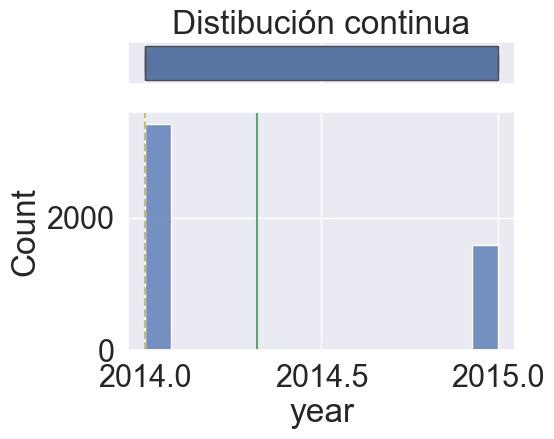

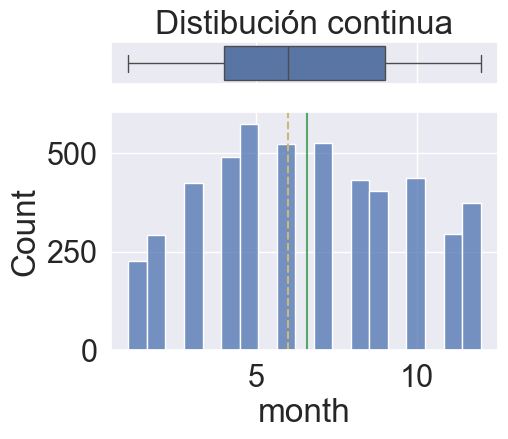

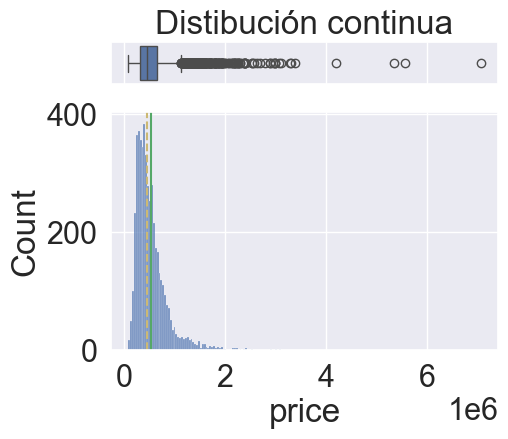

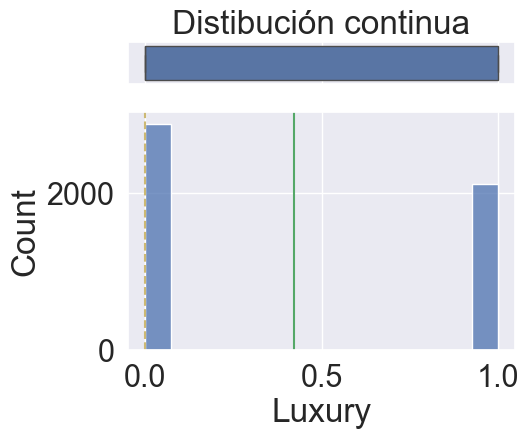

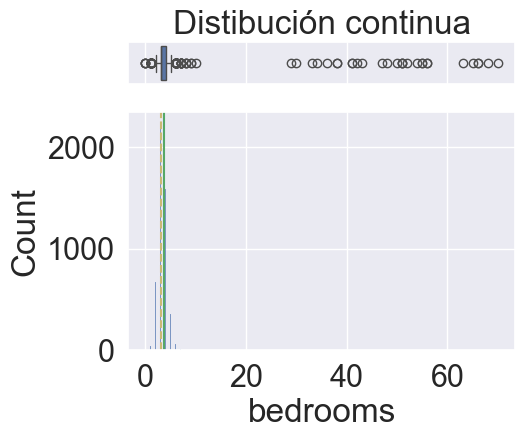

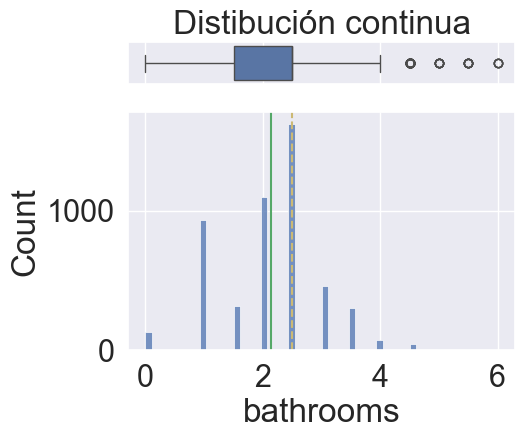

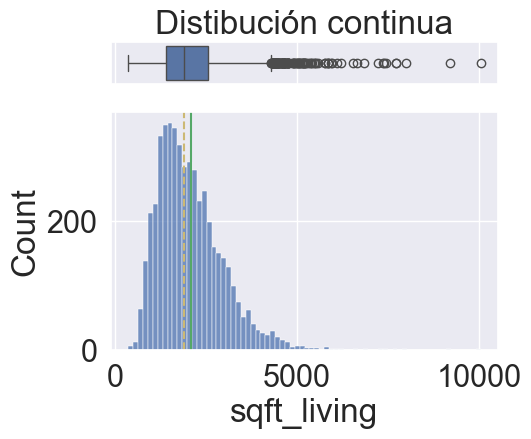

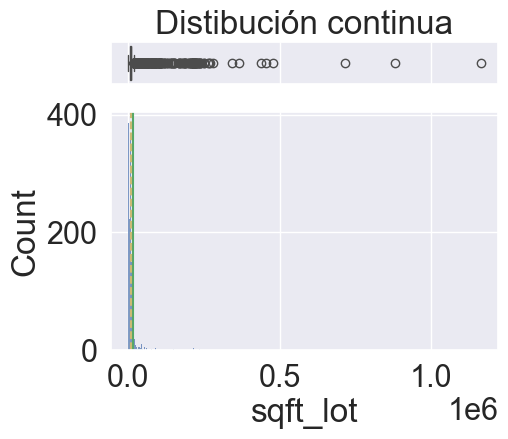

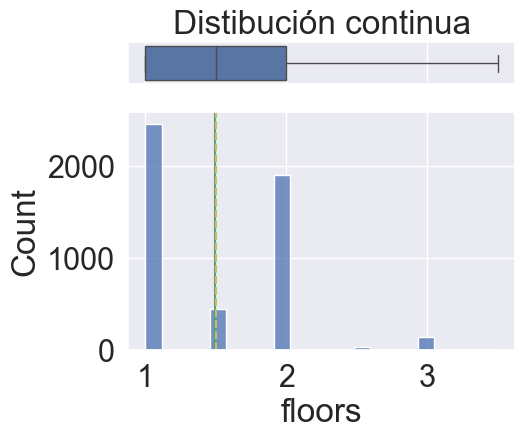

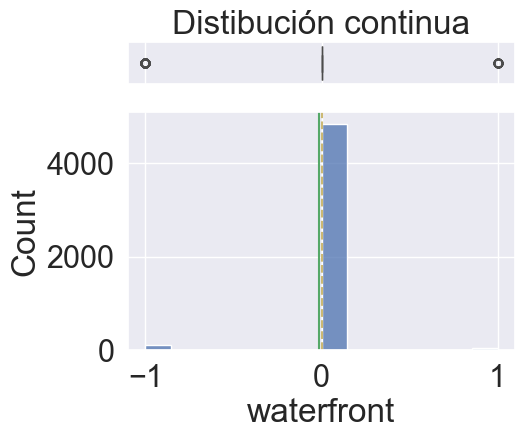

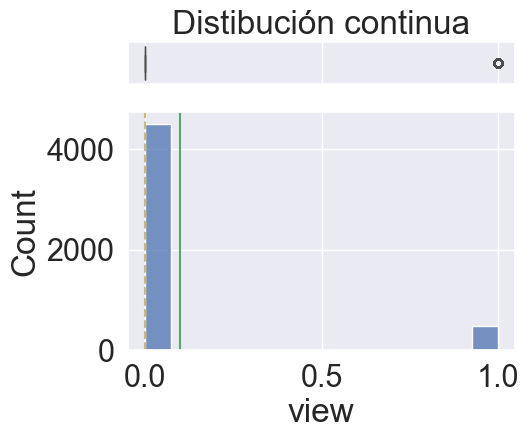

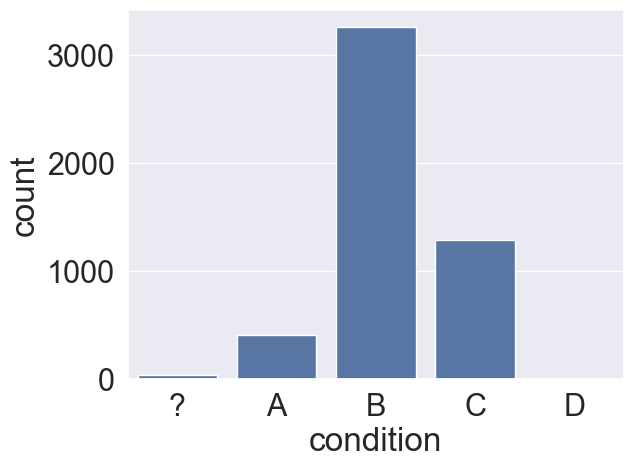

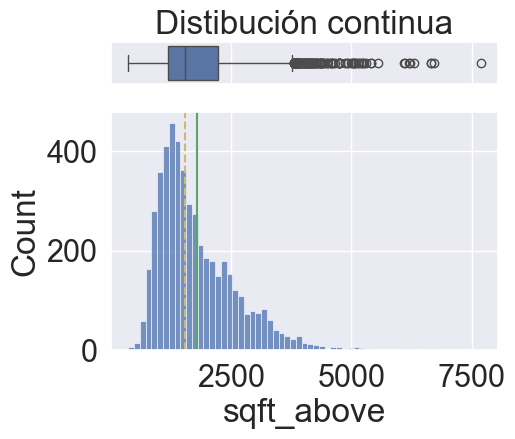

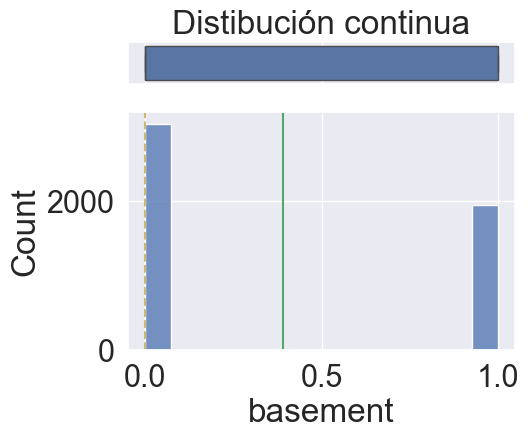

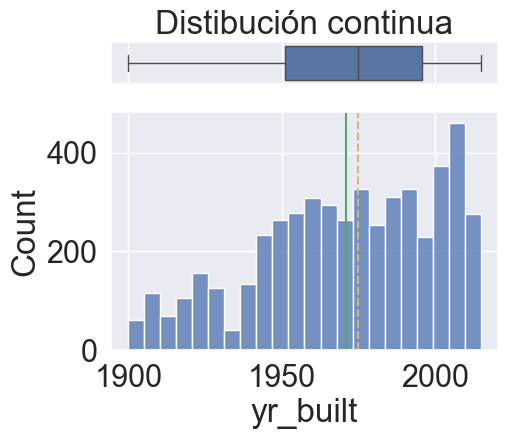

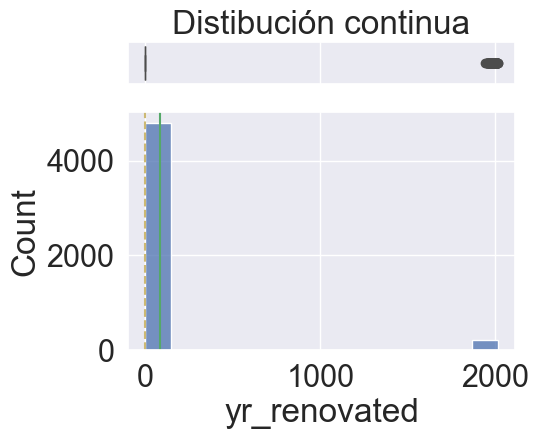

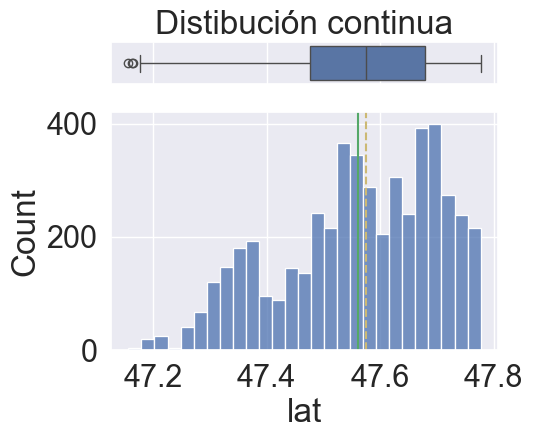

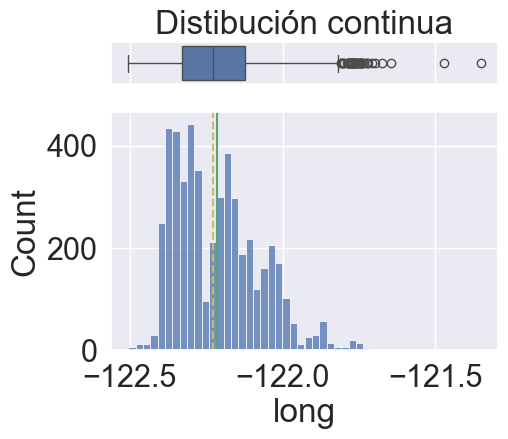

In [11]:
for col in df_Viv.columns:
    data_mining.plot(df_Viv[col])

Se realiza la división del dataframe entre variables predictoras y la variable objetivo.

In [12]:
imput = df_Viv.drop(['price'],axis=1)
imput.head()

,year,month,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


In [13]:
varObj = df_Viv.price

### Etiquetas de tipo de variables

Las variables 'Luxury', 'waterfront', 'view' y 'basement' se pasan a categóricas.

In [14]:
for col in imput.columns:
    if imput[col].nunique() < 4:
        imput[col] = df_Viv[col].astype('category')

### Outliers

Pasemos a la gestión de posibles outliers de nuestras variables continuas, primero se calcula el coeficiente de asimetría para cada variable.

In [15]:
imput.select_dtypes(include=np.number).skew()

month            0.069568
bedrooms        12.916180
bathrooms        0.035777
sqft_living      1.404513
sqft_lot        13.051348
floors           0.618237
sqft_above       1.414411
yr_built        -0.465003
yr_renovated     4.495506
lat             -0.511038
long             0.796275
dtype: float64

La mayoría de variables presentan una asimetría importante ya sea por la derecha o por la izquierda, excepto 'month' y 'bathrooms' que tiene un coeficiente de asimetría cercano al 0, con el que podriamos considerar distribución simétrica para dichas variables.

In [16]:
imput.select_dtypes(include=np.number).apply(lambda x: data_mining.manage_outliers(x))

,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,lat,long
0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00
1,0.0,0.6,0.08,0.28,7.36,0.0,0.24,0.0,4.32,0.0,0.04
2,0.0,0.6,0.08,0.28,7.36,0.0,0.24,0.0,4.32,0.0,0.04


Varias variables tienen outliers, todas menos 'sqft_lot' y 'yr_renovated' no superan el 1% de outliers, aún así, solo imputaremos los outliers de 'bedrooms', 'sqft_living' y 'sqft_above', del resto de variables no porque luego se les realizará transformaciones con las cuales nos podemos permitir conservar los outliers, y hasta sería más adecuado como por ejemplo en la varibale 'sqft_lot', que si le aplicamos *winsor*, acumula muchos valores en la cola derecha de la distribución.

In [17]:
to_wins = imput[['bedrooms', 'sqft_living', 'sqft_above']].copy()
not_wins = imput[['month', 'bathrooms', 'sqft_lot', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long']].copy()

Se aplica la gestión de outliers en modo *winsor* para las variables correspondientes en las cuales dichos outliers alterán gravemente la distribución de los datos

In [18]:
imput_winsor = to_wins.apply(lambda x: data_mining.manage_outliers(x,clas='winsor'))

imput_winsor.sort_values(by='bedrooms').tail()

,bedrooms,sqft_living,sqft_above
3964,10,2420,1380
650,10,1100,820
42,10,3190,1890
2648,10,1240,1080
1763,10,1190,1190


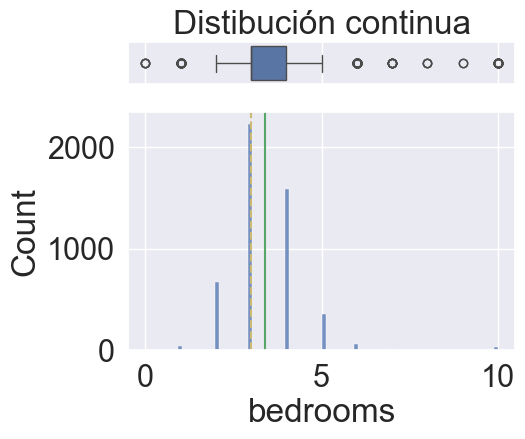

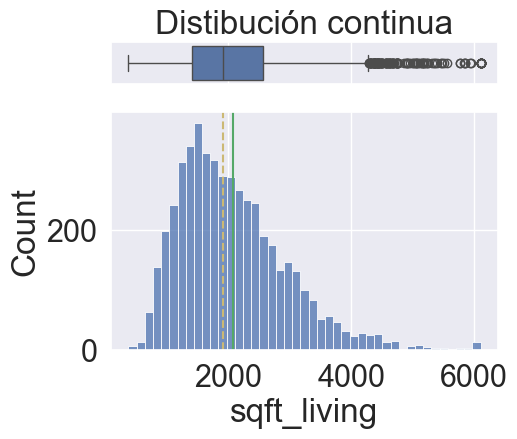

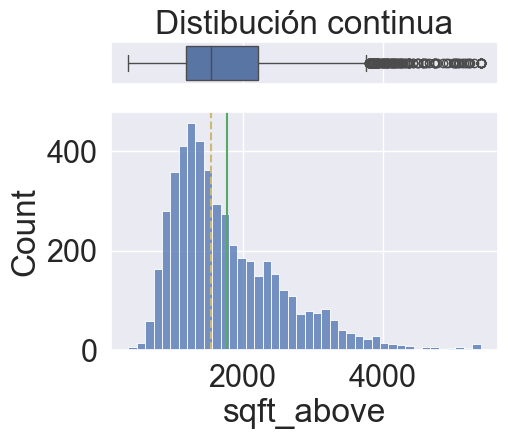

In [19]:
for col in imput_winsor.columns:
    data_mining.plot(imput_winsor[col])

Volvemos a juntar todas las variables de 'imput' con las variables las cuales se ha aplicado el *winsor* para gestionar los outliers y el resto de variables. Visualizamos dicho dataframe.

In [20]:
imput_wins = imput_winsor.join(not_wins)
imputwins_cat_cont = imput_wins.join(imput.select_dtypes(exclude=np.number))

In [21]:
imputwins_cat_cont

,bedrooms,sqft_living,sqft_above,month,bathrooms,sqft_lot,floors,yr_built,yr_renovated,lat,long,year,Luxury,waterfront,view,condition,basement
0,3,2070,1540,7,2.5,-1,1.0,1980,0,47.5936,-122.013,2014,1,0,0,C,1
1,2,1640,1540,6,1.5,-1,1.5,1916,0,47.6624,-122.325,2014,1,0,0,A,1
2,4,3720,3720,10,3.5,-1,1.0,2007,0,47.3216,-121.940,2014,1,0,1,B,0
3,3,2260,1880,12,3.5,-1,2.0,2003,0,47.6422,-122.361,2014,1,0,0,B,1
4,3,2050,1170,10,2.0,-1,1.0,1960,0,47.7447,-122.328,2014,0,0,0,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1390,1180,2,2.5,1821,2.0,2007,0,47.5537,-122.282,2015,0,0,0,B,1
4996,4,1660,1660,1,2.0,8160,1.0,1974,0,47.4483,-122.129,2015,0,0,0,B,0
4997,3,1480,1480,2,2.0,8475,1.0,1968,0,47.3126,-122.361,2015,0,0,0,C,0
4998,3,2540,1580,3,3.0,18900,1.0,1978,0,47.7540,-122.144,2015,0,0,0,B,1


### NAs

Asignamos NAs a los valores de las variables que no son posibles según su respectiva naturaleza. A estos valores se les denomina NAs no declarados.

In [22]:
imputwins_cat_cont.loc[df_Viv['sqft_lot'] == -1, 'sqft_lot'] = np.nan
imputwins_cat_cont.loc[df_Viv['waterfront'] == -1, 'waterfront'] = np.nan

In [23]:
imput_cont = imputwins_cat_cont.select_dtypes(include=np.number)

Para imputar los NAs de estas variables se realizarán mediante dos métodos de imputación distintos: K-Nearest Neighbors y Random Forest Classifier. Extraemos la variables numéricas de 'imput' en 'imput_cont', debido a que la función 'KNNImputer' que proporciona 'sklearn' requiere que todas las variables sean numéricas.

#### Imputación mediante K-Nearest Neighbors.

Para la variable 'sqft_lot', se utiliza la imputación basada en vecinos cercanos K-Nearest Neighbors, este método de imputación utiliza los valores de los registros más cercanos para estimar los valores faltantes, en este caso como tenemos una variable continua de la cual estimar sus NAs, se calcula el promedio de los valores de los vecinos más cercanos

In [24]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
imput_cont_scaled = scaler.fit_transform(imput_cont)

In [26]:
#Aplicamos la imputación
imputer_knn = KNNImputer(n_neighbors=5)
imput_cont_imputed_scaled = imputer_knn.fit_transform(imput_cont_scaled)

In [27]:
#Revertimos el escalado a la escala original
imput_cont_imputed = scaler.inverse_transform(imput_cont_imputed_scaled)

In [28]:
#Dataframe de las variables númericas con la nueva variable imputada
imput_cont_imputed = pd.DataFrame(imput_cont_imputed, columns=imput_cont.columns)

Actualizamos y visualizamos el dataframe original.

In [29]:
imputwins_cat_cont.update(imput_cont_imputed)
imputwins_cat_cont

,bedrooms,sqft_living,sqft_above,month,bathrooms,sqft_lot,floors,yr_built,yr_renovated,lat,long,year,Luxury,waterfront,view,condition,basement
0,3,2070,1540,7,2.5,11471.4,1.0,1980,0,47.5936,-122.013,2014,1,0,0,C,1
1,2,1640,1540,6,1.5,4718.4,1.5,1916,0,47.6624,-122.325,2014,1,0,0,A,1
2,4,3720,3720,10,3.5,46005.8,1.0,2007,0,47.3216,-121.940,2014,1,0,1,B,0
3,3,2260,1880,12,3.5,2731.4,2.0,2003,0,47.6422,-122.361,2014,1,0,0,B,1
4,3,2050,1170,10,2.0,7853.4,1.0,1960,0,47.7447,-122.328,2014,0,0,0,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1390,1180,2,2.5,1821.0,2.0,2007,0,47.5537,-122.282,2015,0,0,0,B,1
4996,4,1660,1660,1,2.0,8160.0,1.0,1974,0,47.4483,-122.129,2015,0,0,0,B,0
4997,3,1480,1480,2,2.0,8475.0,1.0,1968,0,47.3126,-122.361,2015,0,0,0,C,0
4998,3,2540,1580,3,3.0,18900.0,1.0,1978,0,47.7540,-122.144,2015,0,0,0,B,1


#### Imputación mediante Random Forest Classifier.

Los NAs que tenemos en 'waterfront' son valores que teniamos como -1 en una variable que solo debería tener categorías 0 y 1. Entonces, ¿cuál sería la opción correcta? 

Suponer que realmente son 1s es arriesgado cuando en dicha variable tenemos muy pocos 1s y debido a que ya en la variable 'sqft_lot' también teniamos valores -1 cuando es una variable continua que no recoge solo 0s y 1s. Lo más oportuno sería tomar una imputación basada en predecir el NA usando los patrones de las demás variables, Random Forest Classifier. 

A diferencia del anterior método de imputación KNN, nuestra función del módulo 'data_mining' que imputa por RF los NAs no es sensible a la distinción de variables numéricas y categóricas de nuestro dataframe, debido a que convierte las variables categóricas en numéricas usando one-hot encoding.

In [30]:
imputwins_cat_cont_imputed = imputwins_cat_cont
columnas_a_imputar = [ 'waterfront']

In [31]:
for columna in columnas_a_imputar:
    imputwins_cat_cont_imputed = data_mining.imputer_RF(imputwins_cat_cont_imputed, columna)

Se resuelve un pequeño inconveniente que podría generar problemas más adelante con las etiquetas de las categorías de 'waterfront'...

In [32]:
imputwins_cat_cont_imputed['waterfront'].unique()

[0, 1]
Categories (3, int64): [-1, 0, 1]

In [33]:
imputwins_cat_cont_imputed['waterfront'] = imputwins_cat_cont_imputed['waterfront'].cat.remove_categories(-1)
imputwins_cat_cont_imputed['waterfront'].unique()

[0, 1]
Categories (2, int64): [0, 1]

Concatenamos variables predictoras y objetivo para empezar a trabajar como un único dataframe en común.

In [34]:
df_imputado_preds_obj = pd.concat([imputwins_cat_cont_imputed, varObj], axis=1)
df_imputado_preds_obj

,bedrooms,sqft_living,sqft_above,month,bathrooms,sqft_lot,floors,yr_built,yr_renovated,lat,long,year,Luxury,waterfront,view,condition,basement,price
0,3,2070,1540,7,2.5,11471.4,1.0,1980,0,47.5936,-122.013,2014,1,0,0,C,1,653450
1,2,1640,1540,6,1.5,4718.4,1.5,1916,0,47.6624,-122.325,2014,1,0,0,A,1,710000
2,4,3720,3720,10,3.5,46005.8,1.0,2007,0,47.3216,-121.940,2014,1,0,1,B,0,780000
3,3,2260,1880,12,3.5,2731.4,2.0,2003,0,47.6422,-122.361,2014,1,0,0,B,1,795000
4,3,2050,1170,10,2.0,7853.4,1.0,1960,0,47.7447,-122.328,2014,0,0,0,A,1,399950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1390,1180,2,2.5,1821.0,2.0,2007,0,47.5537,-122.282,2015,0,0,0,B,1,370000
4996,4,1660,1660,1,2.0,8160.0,1.0,1974,0,47.4483,-122.129,2015,0,0,0,B,0,374950
4997,3,1480,1480,2,2.0,8475.0,1.0,1968,0,47.3126,-122.361,2015,0,0,0,C,0,234000
4998,3,2540,1580,3,3.0,18900.0,1.0,1978,0,47.7540,-122.144,2015,0,0,0,B,1,475000


In [35]:
df_imputado_preds_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   bedrooms      5000 non-null   int64   
 1   sqft_living   5000 non-null   int64   
 2   sqft_above    5000 non-null   int64   
 3   month         5000 non-null   int64   
 4   bathrooms     5000 non-null   float64 
 5   sqft_lot      5000 non-null   float64 
 6   floors        5000 non-null   float64 
 7   yr_built      5000 non-null   int64   
 8   yr_renovated  5000 non-null   int64   
 9   lat           5000 non-null   float64 
 10  long          5000 non-null   float64 
 11  year          5000 non-null   category
 12  Luxury        5000 non-null   category
 13  waterfront    5000 non-null   category
 14  view          5000 non-null   category
 15  condition     5000 non-null   category
 16  basement      5000 non-null   category
 17  price         5000 non-null   int64   
dtypes: categ

### Transformación de Variables

#### Transformación de Continuas

Primero, se debe de estudiar si es conveniente transformar la variable objetivo.

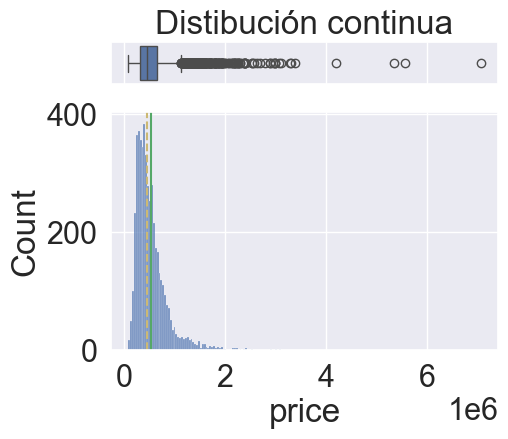

In [36]:
objetivo = 'price'
data_mining.plot(df_imputado_preds_obj[objetivo])

Se observa que tiene asimetría por la derecha (sesgo positivo), se decide aplicarle una tranformación Box-Cox, puesto que el modelo de regresión a realizar posteriormente, es sensible a la normalidad de la variable objetivo.

In [37]:
data_mining.boxcox_transf(df_imputado_preds_obj, objetivo)

np.float64(-0.24422525190625913)

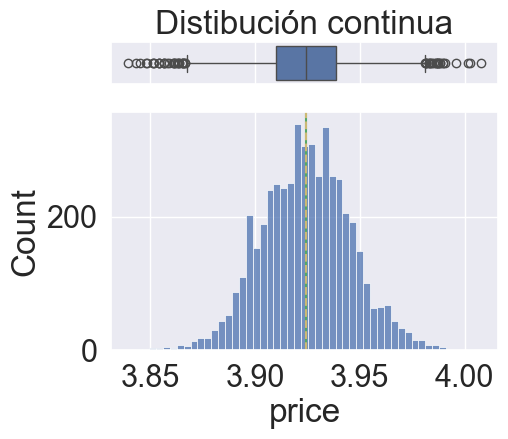

In [38]:
data_mining.plot(df_imputado_preds_obj[objetivo])

A continuación, se evaluará la mejor transformación para las variables continuas predictoras en función del coeficiente de correlación lineal de pearson frente a la variable objetivo, según una serie de transformaciones posibles.

In [39]:
predictoras_cont = df_imputado_preds_obj.select_dtypes(include='number').columns.tolist()
predictoras_cont = [col for col in predictoras_cont if col != objetivo]

In [40]:
data_mining.transf_objpearson(df_imputado_preds_obj, predictoras_cont, objetivo)

No se percibe grandes diferencias entre la distribución identidad de cada variable y cada una de sus transformaciones. Las variables 'bedrooms, 'bathrooms', 'floors' y 'yr_renovated' se tramificarán y se pasarán categóricas debido a que no tienen una alta relación con la variable objetivo con sus distribuciones originales y a lo anteriormente mencionado, además de la propia naturaleza de sus distribuciones. A 'month', 'lat' y 'long' se decide no aplicarle ninguna transformación, el resto se transforman según lo que se muestra a continuación, aunque tampoco obtendremos unos cambios muy significativo en el modelado posterior.

In [41]:
df_imputado_preds_obj['sqft_living'] = np.sqrt(df_imputado_preds_obj['sqft_living'])
df_imputado_preds_obj['sqft_lot'] = np.log(df_imputado_preds_obj['sqft_lot'])
df_imputado_preds_obj['sqft_above'] = np.sqrt(df_imputado_preds_obj['sqft_above'])

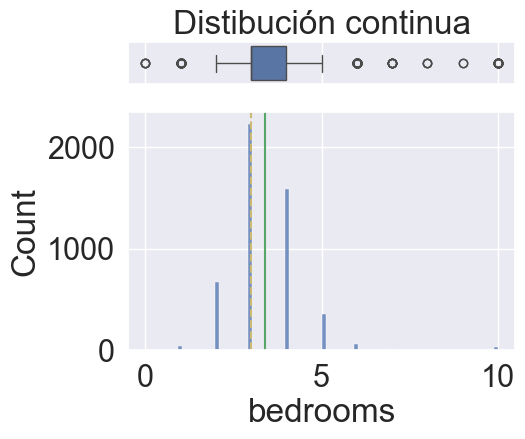

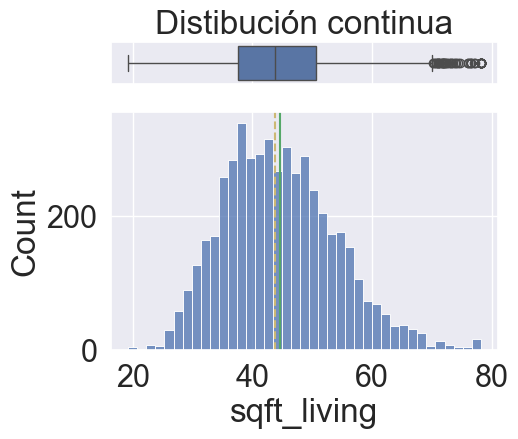

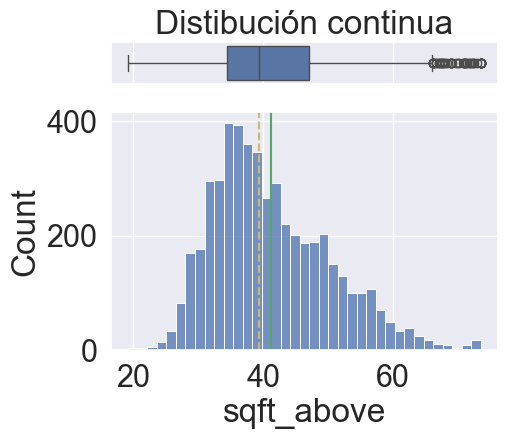

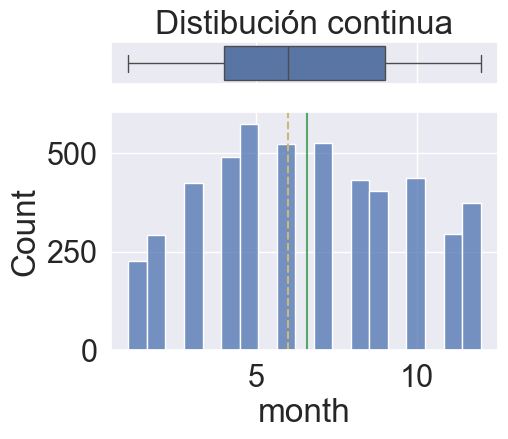

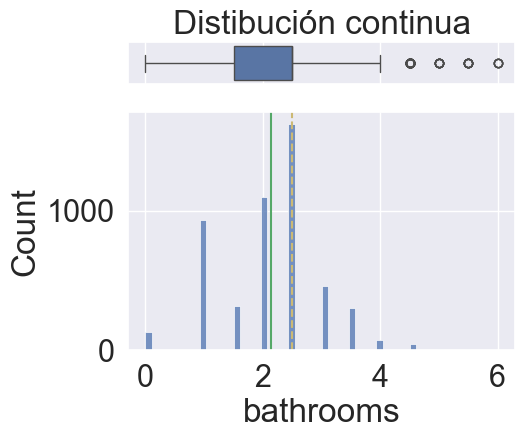

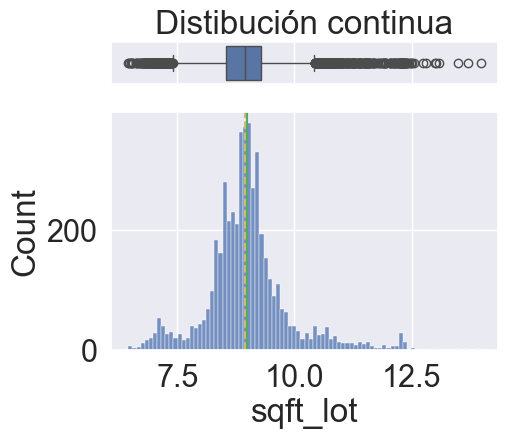

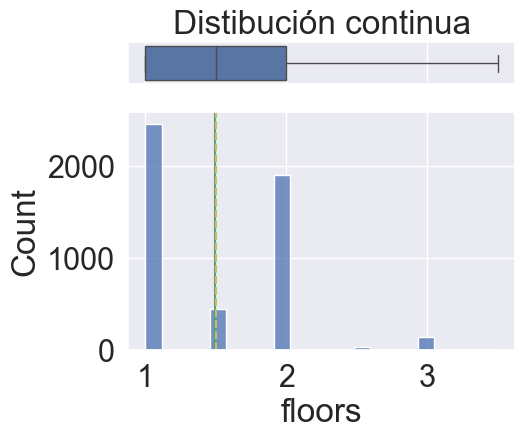

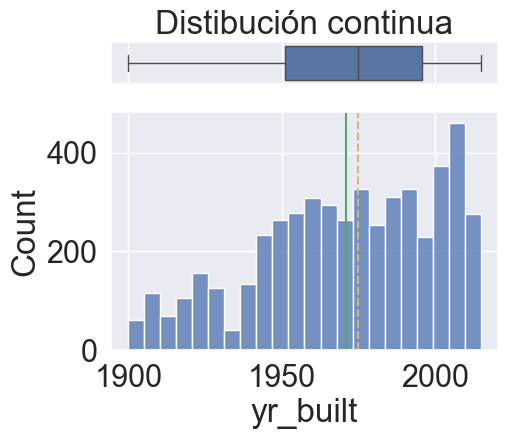

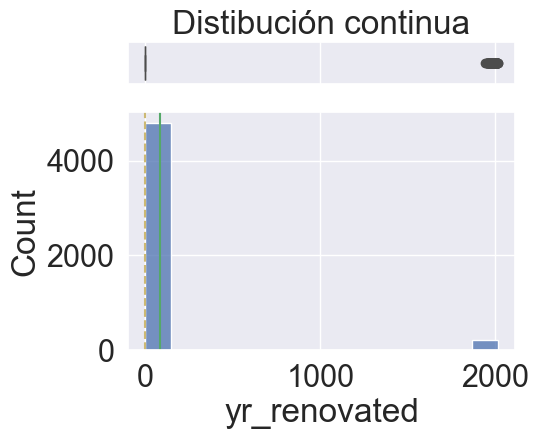

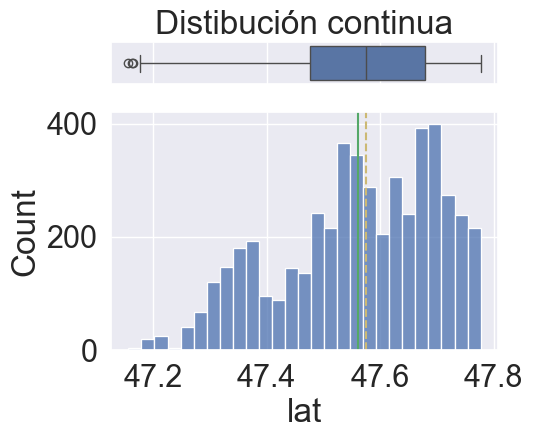

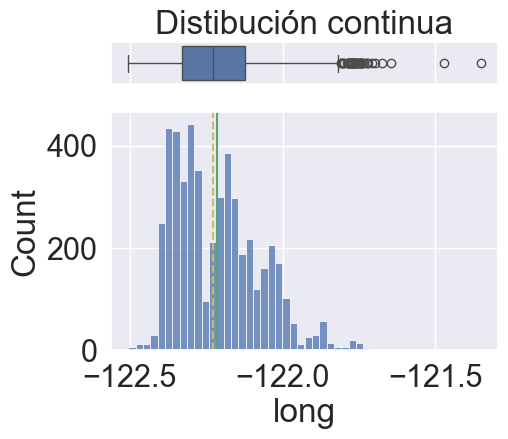

In [42]:
for col in df_imputado_preds_obj[predictoras_cont]:
    data_mining.plot(df_imputado_preds_obj[col])

Las siguientes variables se transformarán directamente a categóricas, bajo sus respectivas condiciones y criterio más apropiado visualizando sus descriptivos.

In [43]:
df_imputado_preds_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   bedrooms      5000 non-null   int64   
 1   sqft_living   5000 non-null   float64 
 2   sqft_above    5000 non-null   float64 
 3   month         5000 non-null   int64   
 4   bathrooms     5000 non-null   float64 
 5   sqft_lot      5000 non-null   float64 
 6   floors        5000 non-null   float64 
 7   yr_built      5000 non-null   int64   
 8   yr_renovated  5000 non-null   int64   
 9   lat           5000 non-null   float64 
 10  long          5000 non-null   float64 
 11  year          5000 non-null   category
 12  Luxury        5000 non-null   category
 13  waterfront    5000 non-null   category
 14  view          5000 non-null   category
 15  condition     5000 non-null   category
 16  basement      5000 non-null   category
 17  price         5000 non-null   float64 
dtypes: categ

In [44]:
df_imputado_preds_obj['bedrooms'] = df_imputado_preds_obj['bedrooms'].apply(lambda x: 'Menor o igual a 5' if x <= 5 else 'Mayor a 5')
df_imputado_preds_obj['bedrooms'] = df_imputado_preds_obj['bedrooms'].astype('category')

In [45]:
df_imputado_preds_obj['floors'] = np.floor(df_imputado_preds_obj['floors'])
df_imputado_preds_obj['floors'] = df_imputado_preds_obj['floors'].astype(int).astype('category')

In [46]:
df_imputado_preds_obj['bathrooms'] = np.ceil(df_imputado_preds_obj['bathrooms'])
df_imputado_preds_obj['bathrooms'] = df_imputado_preds_obj['bathrooms'].apply(lambda x: 'Menor o igual a 2' if x <= 2 else 'Mayor a 2')
df_imputado_preds_obj['bathrooms'] = df_imputado_preds_obj['bathrooms'].astype('category')

In [47]:
df_imputado_preds_obj['quarter'] = pd.cut(df_imputado_preds_obj['month'], bins=[0, 4, 8, 12], labels=[1, 2, 3], right=True)
df_imputado_preds_obj['quarter'] = df_imputado_preds_obj['quarter'].astype('category')
df_imputado_preds_obj.drop(['month'], axis=1, inplace=True)

In [48]:
df_imputado_preds_obj['renovated'] = np.where(df_imputado_preds_obj['yr_renovated'] != 0, 1, 0)
df_imputado_preds_obj['renovated'] = df_imputado_preds_obj['renovated'].astype('category')
df_imputado_preds_obj.drop(['yr_renovated'], axis=1, inplace=True)

Categorizamos 'yr_built' con OptimalBinning puesto que no hay una buena transformacion respecto a 'price' para ella, y tiene una distribución algo anormal, plana pero algo asimétrica.

In [49]:
from optbinning import ContinuousOptimalBinning

In [50]:
df_imputado_preds_obj['yr_built'] = df_imputado_preds_obj['yr_built'].astype(int)

In [51]:
optb = ContinuousOptimalBinning(name='yr_built', dtype="numerical", max_n_bins=3)
optb.fit(df_imputado_preds_obj['yr_built'].values, df_imputado_preds_obj['price'])

x_transform_bins = optb.transform(df_imputado_preds_obj['yr_built'].values, metric="bins")
x_transform_bins

#Incluir la variable directamente al dataset
df_imputado_preds_obj['yr_built'] = x_transform_bins

#### Transformación de Categóricas

Visualizamos valores únicos de las variables categóricas que tenemos en nuestro dataframe.

In [52]:
categorical_cols = df_imputado_preds_obj.select_dtypes(include=['category'])

for col in categorical_cols.columns:
    data_mining.unq_vals(categorical_cols[col])

bedrooms: ['Mayor a 5', 'Menor o igual a 5']
bathrooms: ['Mayor a 2', 'Menor o igual a 2']
floors: [1, 2, 3]
year: [2014, 2015]
Luxury: [0, 1]
waterfront: [0, 1]
view: [0, 1]
condition: ['?', 'A', 'B', 'C', 'D']
basement: [0, 1]
quarter: [1, 2, 3]
renovated: [0, 1]


Debido a las pocas categorías 'D' y '?' en la variable *'condition'*, las transformamos a 'B' y 'C' respectivamente.

In [53]:
df_imputado_preds_obj['condition'] = df_imputado_preds_obj['condition'].replace({'?': 'B', 'D': 'C'})

In [54]:
columnas_ordenadas = ['quarter', 'Luxury', 'floors', 'bedrooms', 'bathrooms', 'basement', 'view', 'waterfront', 'condition', 'sqft_lot', 'sqft_living', 'sqft_above', 'yr_built', 'renovated', 'lat', 'long', 'price']

In [55]:
df_imputado_preds_obj = df_imputado_preds_obj[columnas_ordenadas]
df_imputado_preds_obj

,quarter,Luxury,floors,bedrooms,bathrooms,basement,view,waterfront,condition,sqft_lot,sqft_living,sqft_above,yr_built,renovated,lat,long,price
0,2,1,1,Menor o igual a 5,Mayor a 2,1,0,0,C,9.347612,45.497253,39.242834,"(-inf, 1994.50)",0,47.5936,-122.013,3.938989
1,2,1,1,Menor o igual a 5,Menor o igual a 2,1,0,0,A,8.459225,40.496913,39.242834,"(-inf, 1994.50)",0,47.6624,-122.325,3.942111
2,3,1,1,Menor o igual a 5,Mayor a 2,0,1,0,B,10.736523,60.991803,60.991803,"[1994.50, 2009.50)",0,47.3216,-121.940,3.945572
3,3,1,2,Menor o igual a 5,Mayor a 2,1,0,0,B,7.912570,47.539457,43.358967,"[1994.50, 2009.50)",0,47.6422,-122.361,3.946264
4,3,0,1,Menor o igual a 5,Menor o igual a 2,1,0,0,A,8.968702,45.276926,34.205263,"(-inf, 1994.50)",0,47.7447,-122.328,3.919169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,2,Menor o igual a 5,Mayor a 2,1,0,0,B,7.507141,37.282704,34.351128,"[1994.50, 2009.50)",0,47.5537,-122.282,3.915803
4996,1,0,1,Menor o igual a 5,Menor o igual a 2,0,0,0,B,9.006999,40.743098,40.743098,"(-inf, 1994.50)",0,47.4483,-122.129,3.916382
4997,1,0,1,Menor o igual a 5,Menor o igual a 2,0,0,0,C,9.044876,38.470768,38.470768,"(-inf, 1994.50)",0,47.3126,-122.361,3.894635
4998,1,0,1,Menor o igual a 5,Mayor a 2,1,0,0,B,9.846917,50.398413,39.749214,"(-inf, 1994.50)",0,47.7540,-122.144,3.926384


### Estructuramos y aplicamos el modelo adecuado

Visualizamos la matriz de correlación de las variables de nuestro dataframe, para tener una visión global de las variables.

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
#Copiar el DataFrame para trabajar en una nueva instancia
df_transformed = df_imputado_preds_obj.copy()

#Codificar columnas categóricas usando LabelEncoder
categorical_cols = df_transformed.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col].astype(str))

#Calcular la matriz de correlación
correlation_matrix = df_transformed.corr()

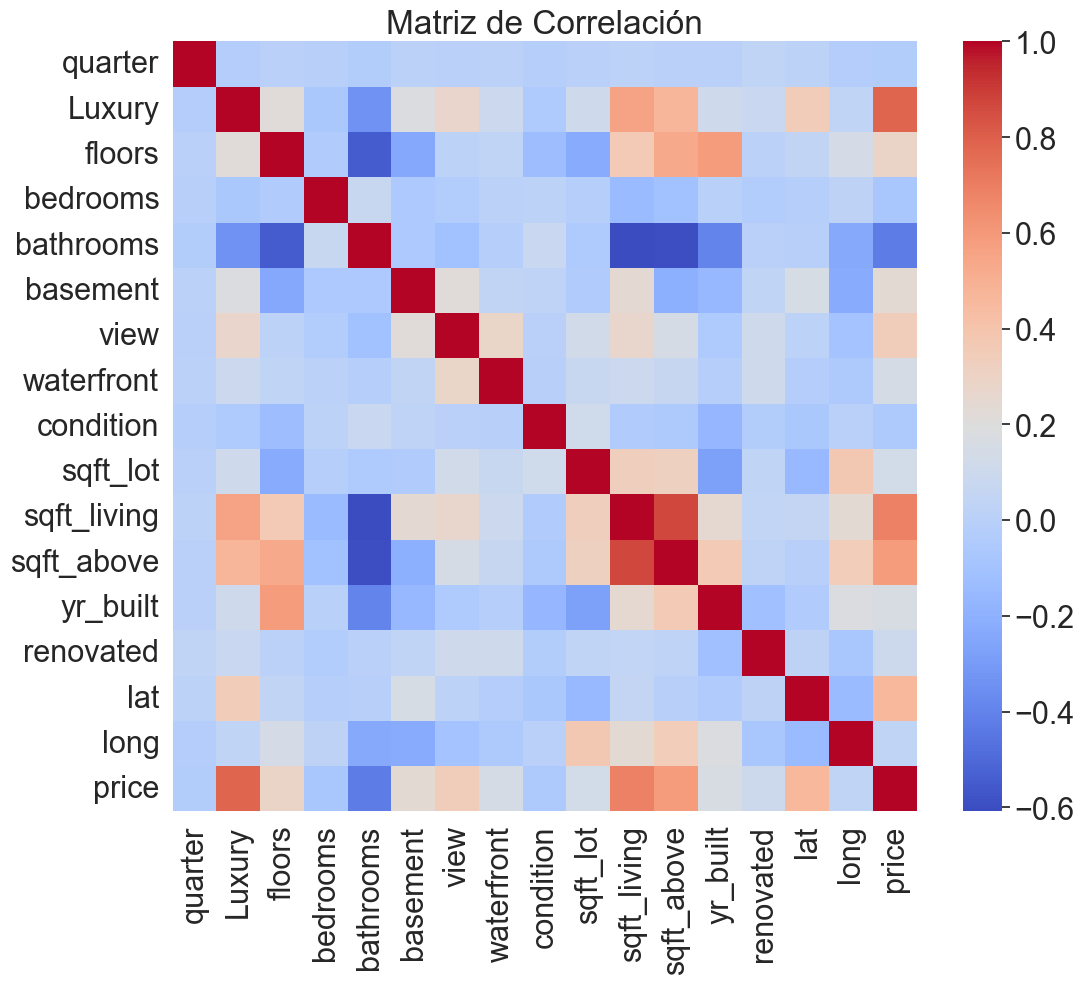

In [58]:
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Matriz de Correlación")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit

In [60]:
X = df_imputado_preds_obj.drop(columns=['price'])  # Variables predictoras
y = df_imputado_preds_obj['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [61]:
data_train = X_train.join(y_train)
data_test = X_test.join(y_test)

#Modelo completo
variables = '+'.join(X_train.columns)
formula = f"price ~ {variables}"

In [62]:
from statsmodels.formula.api import ols

In [63]:
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

#Aplicamos la fórmula de modelo completo
formC=ols_formula(data_train,'price')

In [64]:
modeloC = ols(formC,data=data_train).fit()
modeloC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     785.3
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:04:07   Log-Likelihood:                 12892.
No. Observations:                4000   AIC:                        -2.574e+04
Df Residuals:                    3979   BIC:                        -2.561e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.1378      0.171      6.666      0.000       0.803       1.472
quarter[T.2]                      -0.0008      0.000     -2.046      0.041      -0.001   -3.19e-05
quarter[T.3]                      -0.0020      0.000     -4.886      0.000      -0.003      -0.001
Luxury[T.1]                        0.0182      0.000     43.998      0.000       0.017       0.019
floors[T.2]                        0.0004      0.001      0.821      0.412      -0.001       0.001
floors[T.3]                        0.0013      0.001      1.244      0.214      -0.001       0.003
bedrooms[T.Menor o igual a 5]      0.0033      0.001      3.078      0.002       0.001       0.005
bathrooms[T.Menor o igual a 2]    -0.0011      0.000     -2.442      0.015      -0.002      -0.000
basement[T.1]                      0.0033      0.001      4.959      0.000       0.002       0.005
view[T.1]                          0.0067      0.001     11.556      0.000       0.006       0.008
waterfront[T.1]                    0.0132      0.002      7.326      0.000       0.010       0.017
condition[T.B]                    -0.0040      0.001     -6.745      0.000      -0.005      -0.003
condition[T.C]                    -0.0013      0.001     -2.074      0.038      -0.002   -6.87e-05
yr_built[T.[1994.50, 2009.50)]     0.0022      0.001      4.136      0.000       0.001       0.003
yr_built[T.[2009.50, inf)]         0.0031      0.001      3.890      0.000       0.002       0.005
renovated[T.1]                     0.0035      0.001      4.532      0.000       0.002       0.005
sqft_lot                           0.0002      0.000      0.805      0.421      -0.000       0.001
sqft_living                        0.0004   7.15e-05      5.993      0.000       0.000       0.001
sqft_above                         0.0005   7.66e-05      6.352      0.000       0.000       0.001
lat                                0.0459      0.001     36.634      0.000       0.043       0.048
long                              -0.0045      0.001     -3.456      0.001      -0.007      -0.002
==============================================================================
Omnibus:                      285.729   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.866
Skew:                          -0.475   Prob(JB):                    2.47e-130
Kurtosis:                       4.637   Cond. No.                     1.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.

Hacemos un segundo modelo más simple con las variables que parecen explicar mejor la variable objetivo.

In [65]:
form1 = 'price ~ Luxury + view + sqft_living + sqft_above + lat'

In [66]:
modelo1 = ols(form1,data=data_train).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     2930.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:04:07   Log-Likelihood:                 12775.
No. Observations:                4000   AIC:                        -2.554e+04
Df Residuals:                    3994   BIC:                        -2.550e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7188      0.059     28.891      0.000       1.602       1.835
Luxury[T.1]     0.0189      0.000     44.923      0.000       0.018       0.020
view[T.1]       0.0081      0.001     14.256      0.000       0.007       0.009
sqft_living     0.0008    3.7e-05     20.357      0.000       0.001       0.001
sqft_above      0.0002   3.64e-05      4.927      0.000       0.000       0.000
lat             0.0453      0.001     36.304      0.000       0.043       0.048
==============================================================================
Omnibus:                      283.793   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.066
Skew:                          -0.480   Prob(JB):                    4.92e-126
Kurtosis:                       4.594   Cond. No.                     2.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Con la reducción de variables explicativas del segundo modelo, y como consecuencia, el aumento de explicabilidad del modelo, no disminuye apenas el R² del modelo respecto al modelo completo. No conformes con solo esta mejora, a continuación con la librería relativeImp visualizamos la importancia relativa de las variables predictoras para construir el mejor modelo de regresión lineal y obtener la mejor predicción de la variable objetivo.

In [67]:
import statsmodels.api as sm
import patsy

#Generamos las matrices de diseño según la fórmula de modelo completo
y, X = patsy.dmatrices(formC, data_train, return_type='dataframe')

X

,Intercept,quarter[T.2],quarter[T.3],Luxury[T.1],floors[T.2],floors[T.3],bedrooms[T.Menor o igual a 5],bathrooms[T.Menor o igual a 2],basement[T.1],view[T.1],...,condition[T.B],condition[T.C],"yr_built[T.[1994.50, 2009.50)]","yr_built[T.[2009.50, inf)]",renovated[T.1],sqft_lot,sqft_living,sqft_above,lat,long
3700,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.041922,34.496377,34.496377,47.4807,-122.157
894,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,9.005405,57.358522,57.358522,47.7048,-122.107
2322,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,8.507143,50.000000,50.000000,47.6964,-122.017
4592,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,8.714403,33.015148,30.659419,47.5118,-122.259
3711,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.102310,29.664794,29.664794,47.3056,-122.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.178850,36.193922,36.193922,47.7559,-122.226
3276,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.966603,35.355339,35.355339,47.6625,-122.059
1318,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,9.692396,39.496835,39.496835,47.5966,-122.175
723,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.595603,26.645825,26.645825,47.4939,-122.318


In [68]:
from relativeImp import relativeImp

#Nombres de predictores (en modo dummy) donde quitamos la constante
names=X.columns.tolist()[1:]

#Calculamos importancia relativa
df_results = relativeImp(X.join(y), outcomeName='price', driverNames=names)

#Orden descendente
df_results.sort_values(by='normRelaImpt', ascending=False)

,driver,rawRelaImpt,normRelaImpt
2,Luxury[T.1],0.265715,33.302766
18,lat,0.138137,17.313134
16,sqft_living,0.118838,14.894245
17,sqft_above,0.099641,12.488293
6,bathrooms[T.Menor o igual a 2],0.042764,5.359689
8,view[T.1],0.037210,4.663617
7,basement[T.1],0.028744,3.602536
3,floors[T.2],0.022667,2.840877
9,waterfront[T.1],0.009586,1.201416
15,sqft_lot,0.009000,1.127979


In [69]:
px.bar(
    df_results,
    x='normRelaImpt',
    y='driver',
    title='Importancia relativa por aportación al R²'
).update_yaxes(
    categoryorder="total ascending"
).update_layout(
    height=800,
    margin=dict(l=200),
    yaxis_title="Variables",
    xaxis_title="Importancia relativa",
).show()

Construimos un nuevo modelo con las variables predictoras con mayor importancia relativa.

In [70]:
form2 = 'price ~ Luxury + sqft_above + sqft_living * lat'

In [71]:
modelo1 = ols(form2,data=data_train).fit()
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     2875.
Date:                Wed, 16 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:04:07   Log-Likelihood:                 12746.
No. Observations:                4000   AIC:                        -2.548e+04
Df Residuals:                    3994   BIC:                        -2.544e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.5635      0.289     -5.413      0.000      -2.130      -0.997
Luxury[T.1]         0.0204      0.000     48.547      0.000       0.020       0.021
sqft_above        7.58e-05   3.61e-05      2.101      0.036    5.06e-06       0.000
sqft_living         0.0785      0.007     12.007      0.000       0.066       0.091
lat                 0.1143      0.006     18.826      0.000       0.102       0.126
sqft_living:lat    -0.0016      0.000    -11.874      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      158.321   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.797
Skew:                          -0.222   Prob(JB):                     1.84e-81
Kurtosis:                       4.426   Cond. No.                     3.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Con este último modelo, se realiza la evaluación de los distintos modelos de regresión lineao mediante validación cruzada. Se implementa una función *cross_val_lin* que calcula el coeficiente de determinación para varios modelos, definidos por diferentes fórmulas, y se presentan los resultados de manera clara en un DataFrame.

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

Implementamos la validiación cruzada para los tres modelos contemplados. Esto ayuda a estimar cómo generalizará cada modelo a datos no vistos, reduciendo el riesgo de overfitting o underfitting, para luego tener una mejor valoración final de elección de nuestro modelo.

In [73]:
#Función para comparación por validación cruzada
def cross_val_lin(formula, data, seed=12345):
      #Generamos las matrices de diseño según la fórmula de modelo completo
      y, X = patsy.dmatrices(formula, data, return_type='dataframe')
      
      model = LinearRegression()
      
      #Establecemos esquema de validación fijando random_state (reproducibilidad)
      cv = RepeatedKFold(n_splits=5, n_repeats=20, random_state=seed)
  
      #Obtenemos los resultados de R2 para cada partición tr-tst
      scores = cross_val_score(model, X, y, cv=cv)
  
      #Sesgo y varianza
      print('Modelo: ' + formula)
      print('Coeficiente de determinación R2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
      
      #sns.violinplot(y=scores,palette='viridis')
      
      return(scores)


Mediante el *RepeatedKFold*, se llevarán a cabo un total de 100 iteraciones:
    - 5 particiones (splits): 4 *trains* y 1 *test*, que van rotando sobre todas las combinaciones de las particiones.
    - 20 repeticiones (repeats): El proceso KFold se realiza 20 veces con diferentes particiones.

Cada iteración generará un R², proporcionando un promedio del R² de cada modelo y una medida de la variabilidad que indica la consistencia del modelo en difrentes particiones, obteniendo así un ajuste de capacidad de generalización de cada modelo.

In [74]:
#Lista de fórmulas   
list_form = [formC,form1,form2]
list_form

#Aplicamos a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_lin(x,df_imputado_preds_obj, seed=2022),list_form))

#Trasnponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','R2']

Modelo: price ~ quarter + Luxury + floors + bedrooms + bathrooms + basement + view + waterfront + condition + sqft_lot + sqft_living + sqft_above + yr_built + renovated + lat + long
Coeficiente de determinación R2: 0.796 (0.010)
Modelo: price ~ Luxury + view + sqft_living + sqft_above + lat
Coeficiente de determinación R2: 0.786 (0.010)
Modelo: price ~ Luxury + sqft_above + sqft_living * lat
Coeficiente de determinación R2: 0.782 (0.010)


<Axes: xlabel='Modelo', ylabel='R2'>

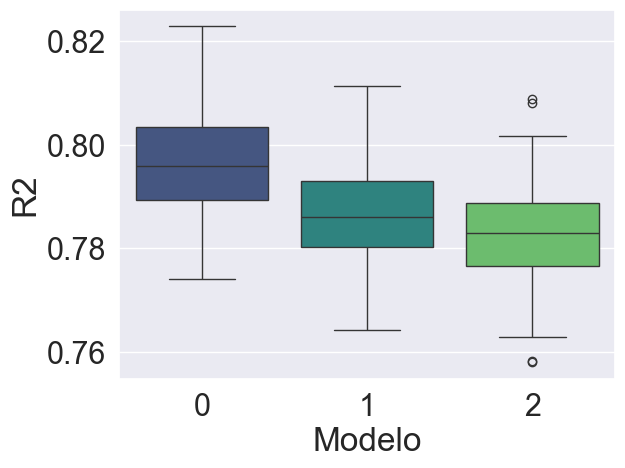

In [75]:
sns.boxplot(x='Modelo',y='R2',data=results,palette='viridis')

Evidenciamos que los tres modelos evaluados generalizan correctamente ante nuevos datos no vistos. Debido a lo ya expuesto anteriormente, el modelo que ofrece una mejor explicabilidad sin penalizar demasiado la predicción de la variable objetivo es el modelo 2, con un coeficiente de determinación bastante bueno algo inferior a 0.8.

No conformes con la obtención de un buen resultado con un modelo tradicional, adicionalmente se probará con algún modelo de los denominados ensamblados. Debido a que tenemos variables categoricas en nuestro dataframe, se empleará con el CatBoost, que no es sensible a la presencia de variables categóricas en neustro dataframe, y no es necesario transformar dichas variables con One-Hot Encoding o Label Encoding.

In [76]:
from catboost import CatBoostRegressor

In [77]:
df_imputado_preds_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   quarter      5000 non-null   category
 1   Luxury       5000 non-null   category
 2   floors       5000 non-null   category
 3   bedrooms     5000 non-null   category
 4   bathrooms    5000 non-null   category
 5   basement     5000 non-null   category
 6   view         5000 non-null   category
 7   waterfront   5000 non-null   category
 8   condition    5000 non-null   category
 9   sqft_lot     5000 non-null   float64 
 10  sqft_living  5000 non-null   float64 
 11  sqft_above   5000 non-null   float64 
 12  yr_built     5000 non-null   object  
 13  renovated    5000 non-null   category
 14  lat          5000 non-null   float64 
 15  long         5000 non-null   float64 
 16  price        5000 non-null   float64 
dtypes: category(10), float64(6), object(1)
memory usage: 323.6+ KB


In [78]:
df_imputado_preds_obj['yr_built'] = df_imputado_preds_obj['yr_built'].astype('category')

In [79]:
X = df_imputado_preds_obj.drop(columns=['price'])
y = df_imputado_preds_obj['price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Aplicamos el modelo *CatBoostRegressor* con RMSE en *loss_function*, así el modelo intenta minimizar esta métrica durante el entrenamiento, lo que significa que el objetivo del modelo es reducir la raíz del error cuadrático medio entre las predicciones y los valores reales, de esta manera permite al modelo ajustarse para hacer predicciones lo más precisas posible. Respecto al resto de hiperparámetros, utilizamos los estándares para problemas simples.

In [81]:
model = CatBoostRegressor(
    iterations=1000,      
    learning_rate=0.1,        
    depth=6,                  
    cat_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 13],  
    loss_function='RMSE',
    verbose=100,              
    train_dir='./catboost_info'           
)

In [82]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

0:	learn: 0.0200635	total: 151ms	remaining: 2m 31s
100:	learn: 0.0068737	total: 2.63s	remaining: 23.4s
200:	learn: 0.0060759	total: 5.07s	remaining: 20.2s
300:	learn: 0.0056121	total: 7.53s	remaining: 17.5s
400:	learn: 0.0052695	total: 10.1s	remaining: 15.1s
500:	learn: 0.0050048	total: 12.5s	remaining: 12.5s
600:	learn: 0.0047770	total: 15s	remaining: 9.98s
700:	learn: 0.0045390	total: 17.6s	remaining: 7.49s
800:	learn: 0.0043237	total: 20.1s	remaining: 5s
900:	learn: 0.0041487	total: 22.7s	remaining: 2.5s
999:	learn: 0.0039745	total: 25.3s	remaining: 0us


In [83]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Calcular MSE
mse = mean_squared_error(y_test, y_pred)

#Tomar raíz cuadrada de MSE para obtener RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

#Calcular el R²
r2 = model.score(X_test, y_test) 
print(f"R²: {r2}")

RMSE: 0.007034663672498815
R²: 0.883427724555793


Con el CatBoost obtenemos un RMSE = 0.007, un valor muy bajo con el que nuestro modelo realiza predicciones muy cercanas a los valores reales, además, se incrementa notoriamente el R².

In [84]:
feature_names = X_train.columns

#Obtener la importancia de las características desde el modelo
feature_importances = model.get_feature_importance()

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

#Ordenar descendente
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

#Imprimir los nombres de las características y su importancia
for feature, importance in zip(importances_df_sorted['Feature'], importances_df_sorted['Importance']):
    print(f"{feature}: {importance}")

Luxury: 27.21343577687863
lat: 25.5250535799993
sqft_living: 16.79771013422226
long: 10.603840448172777
sqft_above: 5.788294298997487
sqft_lot: 5.107498418617105
quarter: 1.6260607495739254
bathrooms: 1.5663887418058782
view: 1.5522102240083786
condition: 1.4306043011725915
yr_built: 0.9746508674275018
floors: 0.6487841462346735
waterfront: 0.44020564118908456
renovated: 0.3481995043426655
basement: 0.25583340144595845
bedrooms: 0.12122976591183776


Como se aprecia, también podemos obtener la importancia de las variables para nuestro modelo de CatBoost, se percibe una similitud respecto a las variables con mayor importancia relativa en la regresión lineal anteriormente estudiada. Como estos modelos ensamblados no son interpretables respecto a la relación de las variables predictoras con la objetivo debido a su naturaleza de caja negra, no es tan necesario tener una explicabilidad disminuyendo las variables explicativas como en la regresión lineal, aunque podemos aumentar la interpretabilidad general utilizando las variables que más importancia tienen en el modelo.

Además, dado que este estudio se enmarca dentro de un enfoque práctico, resulta enriquecedor explorar aplicaciones adicionales de nuestros modelos para ampliar el análisis y profundizar en su utilidad.

In [85]:
selected_features = ['Luxury', 'lat', 'sqft_living', 'long', 'sqft_above', 'sqft_lot']

X = df_imputado_preds_obj[selected_features]
y = df_imputado_preds_obj['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_features = [X.columns.get_loc(col) for col in ['Luxury']]  # Índices de las categóricas

In [86]:
model = CatBoostRegressor(
    iterations=1000,          
    learning_rate=0.1,      
    depth=6,                
    cat_features=cat_features,
    loss_function='RMSE',   
    verbose=100,             
    train_dir='./catboost2_info'
)

model.fit(X_train, y_train)

0:	learn: 0.0200860	total: 1.39ms	remaining: 1.39s
100:	learn: 0.0070623	total: 134ms	remaining: 1.19s
200:	learn: 0.0064000	total: 292ms	remaining: 1.16s
300:	learn: 0.0059168	total: 476ms	remaining: 1.1s
400:	learn: 0.0055111	total: 647ms	remaining: 967ms
500:	learn: 0.0051703	total: 816ms	remaining: 812ms
600:	learn: 0.0048746	total: 968ms	remaining: 643ms
700:	learn: 0.0046193	total: 1.1s	remaining: 468ms
800:	learn: 0.0043912	total: 1.25s	remaining: 310ms
900:	learn: 0.0041731	total: 1.37s	remaining: 151ms
999:	learn: 0.0039891	total: 1.5s	remaining: 0us


In [87]:
y_pred = model.predict(X_test)

#Calcular MSE
mse = mean_squared_error(y_test, y_pred)

#Tomar raíz cuadrada de MSE para obtener RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Calcular el R²
r2 = model.score(X_test, y_test)
print(f"R²: {r2}")

RMSE: 0.007761116610977737
R²: 0.8581082927874251


Puesto que no tenemos datos nuevos para valorar empíricamente que tan bien predicen nuestros modelos la variable *'precio'* (ni se han apartado al inicio del estudio..., para que los modelos no los vean), se puede dar como finalizado este estudio con bastantes conclusiones sobre las prácticas y aplicaciones abordadas durante el mismo, consiguiendo con un éxito destacable el objetivo de predecir el precio de viviendas con las variables de nuestro dataset.

Se han implementado prácticas de minería de datos y exploración para identificar anomalías en los datos y realizar la preparación necesaria para construir modelos predictivos con el objetivo de estimar la variable objetivo continua *'price'*. El proceso incluyó la construcción de un modelo de regresión lineal como referencia tradicional y un modelo avanzado de tipo ensamblado, CatBoost.

En el caso de la regresión lineal, se priorizó la simplicidad del modelo con un enfoque en la interpretabilidad de los datos. Mediante un proceso cuidadoso de selección de variables, se logró mantener un R² competitivo, sin una reducción significativa respecto al modelo completo. Además, se empleó validación cruzada para garantizar que los modelos de regresión lineal propuestos generalizan adecuadamente a datos nuevos, consolidando su robustez.

Por otro lado, el modelo de CatBoost demostró ser una herramienta poderosa para el problema abordado. Con su capacidad para manejar relaciones no lineales y aprovechar las variables categóricas ya estructuradas, el CatBoost alcanzó un R² significativamente mayor, reflejando una mayor capacidad explicativa del modelo. Además, obtuvo un RMSE notablemente bajo, indicando una reducción considerable en el error de predicción respecto a la regresión lineal. Estas métricas subrayan el potencial del CatBoost para obtener predicciones precisas, aunque a costa de una menor interpretabilidad frente a los modelos lineales.

En conclusión, mientras que la regresión lineal se posiciona como una opción más sencilla y explicable, el CatBoost destaca por su rendimiento superior en términos de precisión, ofreciendo un balance entre interpretabilidad y exactitud según las necesidades del problema.

## Autor: Alfonso Guisado González